In [ ]:
!git clone
!pip install -e .

In [1]:
from cellname import predict_celltype
import scanpy as sc
import os

In [2]:
os.getcwd()

'/Users/dalena/Data/pydata/cellname/cellname/notebook'

In [3]:
adata = sc.read("../data/s_scanpy.h5ad")
tempAdata = adata.raw.to_adata()
adata.raw = tempAdata

In [4]:
cl = predict_celltype(adata, clusters="leiden",q = 0.5)

In [5]:
cl

,activity score,cell type,p-value,markers,adjusted p-value BH
cluster,,,,,
0,27.290147,Purkinje neurons,5.513766e-05,"PRKCA,PPM1E,PVALB,DLGAP1,ATP2B2,PRKG1,CPLX1",2.319792e-03
1,87.449732,Neurons,6.327218e-52,"HDAC11,FBXW7,RYR2,ATP6V1H,DISP2,KCNC1,NCALD,GA...",1.464118e-48
2,51.986108,Neurons,2.482824e-25,"HDAC11,FBXW7,VSNL1,CLSTN3,CDK5,SLC12A5,NRN1,HP...",5.222959e-23
3,35.936306,Purkinje neurons,8.736606e-11,"PVALB,CLSTN3,SLC12A5,DLGAP1,ABAT,GRIN1,PPM1E,G...",8.789785e-09
4,31.955863,Purkinje neurons,6.468737e-08,"PRKCA,PPM1E,PVALB,CLSTN3,CALB1,CAMK2A,DLGAP1,G...",4.402546e-06
5,73.635035,Neurons,1.355389e-46,"HDAC11,FBXW7,RYR2,ATP6V1H,DISP2,KCNC1,NCALD,GA...",1.045457e-43
6,27.000173,Purkinje neurons,1.972538e-04,"PRKCA,PPM1E,PVALB,DLGAP1,PRKG1,CPLX1",7.362021e-03
7,52.291853,Neurons,3.198239e-34,"HDAC11,FBXW7,RYR2,ATP6V1H,DISP2,KCNC1,SCRG1,NC...",1.233454e-31
8,38.209442,Neurons,9.007311e-14,"HDAC11,FBXW7,ATP6V1H,VSNL1,CDK5,SLC12A5,HPCA,D...",1.042146e-11


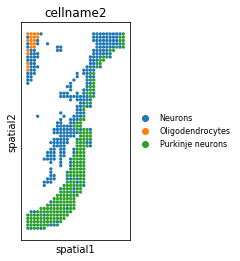

In [6]:
cluster2annotation = {str(x) : y for x,y in cl['cell type'].items()}
# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['leiden'].map(cluster2annotation).astype('category')
adata.obs['cellname2'] = adata.obs['leiden'].map(cluster2annotation).astype('category')
sc.pl.spatial(adata,color="cellname2",legend_fontsize=8,spot_size=100)